<a href="https://colab.research.google.com/github/Nikhildongare123/machine-learning/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

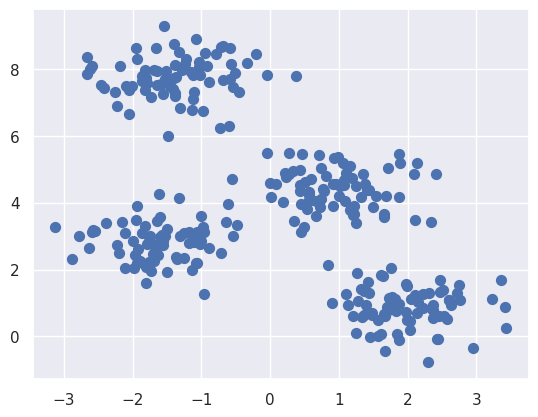

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# for plot styling
import seaborn as sns; sns.set()
import numpy as np
from sklearn.datasets import make_blobs

# generate data
x, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# plot scatter
plt.scatter(x[:, 0], x[:, 1], s=50)
plt.show()


In [8]:
# assign four clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

In [16]:
y_kmeans

array([3, 2, 0, 2, 3, 3, 1, 0, 2, 2, 1, 2, 0, 2, 3, 0, 0, 3, 1, 1, 3, 3,
       0, 1, 1, 0, 3, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 3, 0, 1, 0, 0,
       1, 1, 2, 1, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1, 2, 3, 2, 0, 2, 1, 1, 1,
       2, 3, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 3, 2, 3, 0, 3, 3, 2, 0, 3, 0,
       2, 2, 0, 3, 2, 1, 1, 0, 3, 3, 0, 1, 2, 3, 2, 3, 0, 3, 3, 0, 2, 0,
       1, 1, 3, 2, 3, 0, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       1, 3, 2, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0,
       3, 1, 2, 1, 3, 0, 2, 0, 0, 3, 0, 1, 1, 0, 3, 0, 0, 2, 3, 0, 1, 2,
       3, 3, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 3, 1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2, 1, 1, 3, 3, 0,
       2, 3, 3, 1, 3, 1, 0, 2, 2, 0, 0, 2, 0, 3, 1, 0, 3, 1, 2, 1, 3, 0,
       3, 2, 2, 2, 2, 1, 1, 2, 0, 1, 3, 0, 1, 1, 1, 3, 3, 2, 0, 0, 1, 3,
       2, 1, 0, 2, 0, 3, 3, 1, 1, 0, 3, 3, 3, 0, 2, 2, 3, 3, 0, 3, 3, 3,
       2, 1, 2, 0, 3, 3, 2, 2, 2, 3, 3, 0, 2, 1], d

In [13]:
# import library
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(x, n_clusters, rseed=2):

# randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(x.shape[0])[:n_clusters]
    centers = x[i]
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(x, centers)

        # Find new centers from means of points
        new_centers = np.array([x[labels == j].mean(0)
                                for j in range(n_clusters)])

        # check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

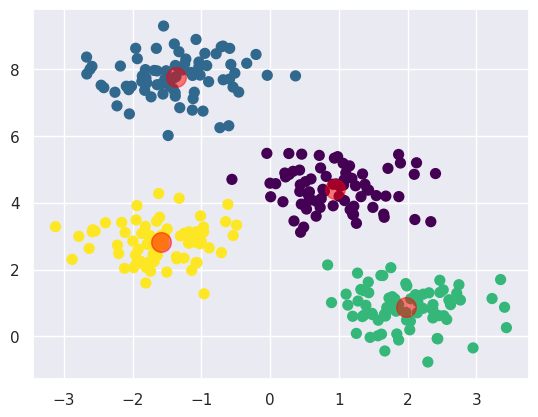

In [15]:
centers, labels = find_clusters(x, 4)
plt.scatter(x[:, 0], x[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.show()

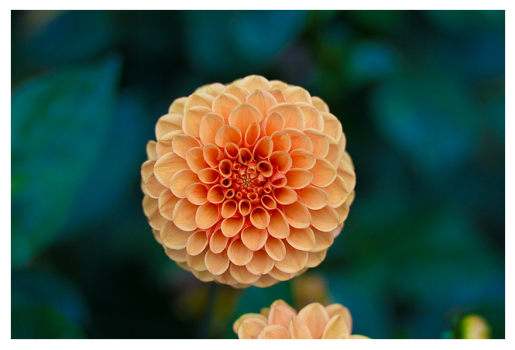

In [18]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [19]:
china.shape

(427, 640, 3)

In [20]:
data = china / 255.0  # normalize data
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [22]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [26]:
def polt_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, G, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);

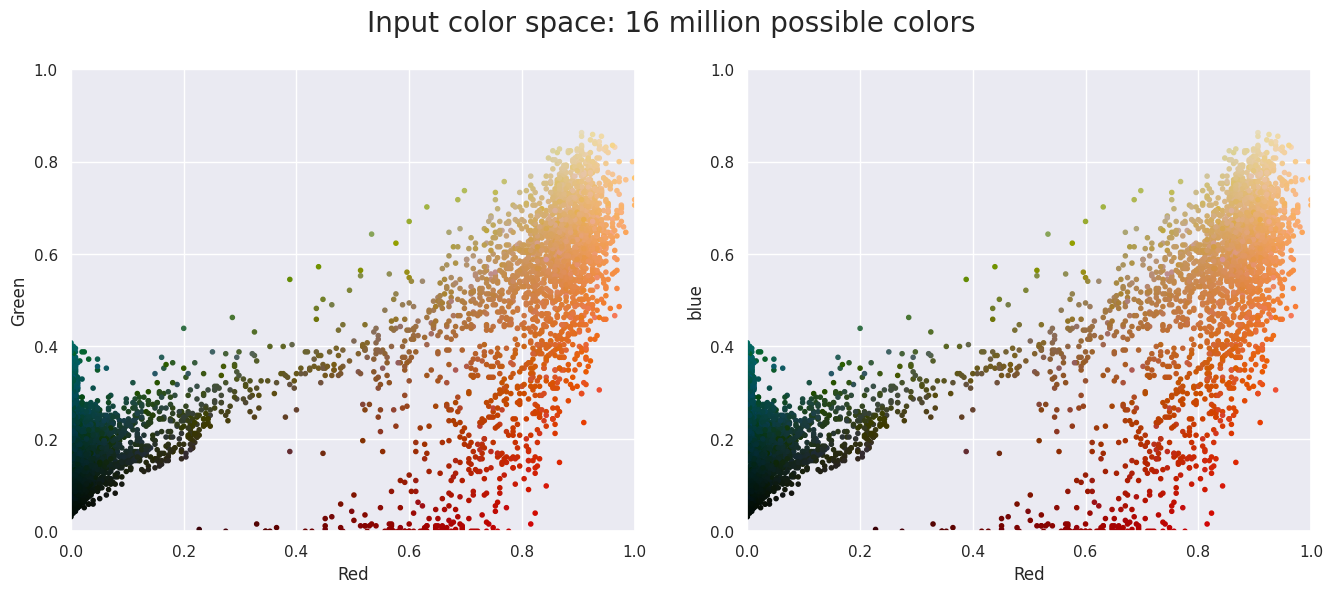

In [27]:
polt_pixels(data, title='Input color space: 16 million possible colors')

In [28]:
import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
polt_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

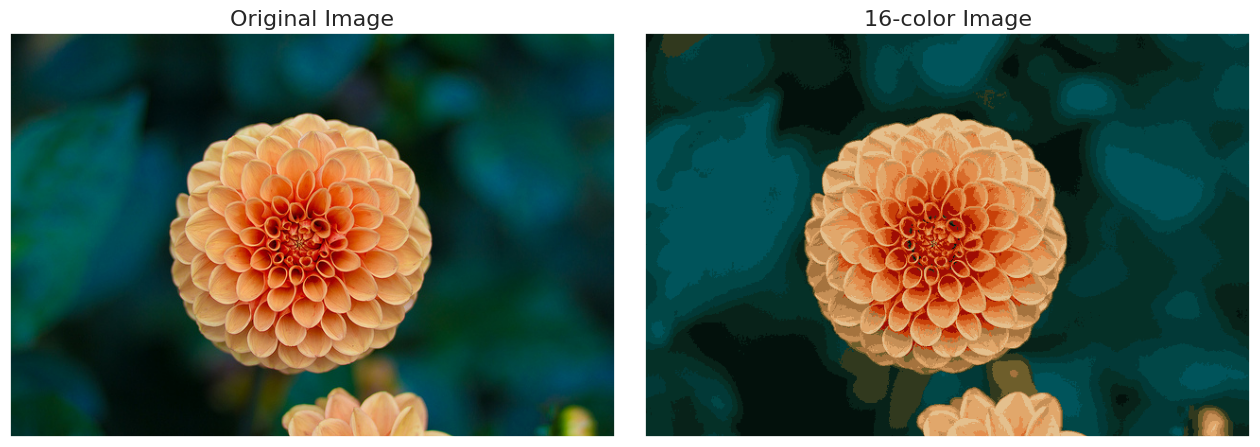

In [29]:
china_recolord = new_colors.reshape(china.shape)
fig,ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolord)
ax[1].set_title('16-color Image', size=16);